<a href="https://colab.research.google.com/github/abhiramoggu/statistics-analysis/blob/main/STATFinalQ1v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##############################################
# 0. IMPORTS (Minimal)
##############################################
import csv
import math
import random  # for uniform random
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy.optimize import minimize

# For reproducibility in random sampling, bootstrapping, etc.
random.seed(123)
np.random.seed(123)

##############################################
# 1. LOAD DATA
##############################################
data_file = "data26002204680.csv"  # your CSV file
data = []
with open(data_file, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        val = float(row[0])
        data.append(val)
data = np.array(data)
n = len(data)


In [ ]:
##############################################
# 2. DEFINE PDFS EXACTLY AS GIVEN
#
#    Each function pdf_i(x, params...) returns
#    the *theoretical* PDF value at x >= 0.
#
#    Domain checks (x >= 0, positivity of
#    parameters, etc.) are omitted or minimal
#    in this skeleton code.
##############################################

def pdf1(x, alpha, beta):
    if x <= 0 or alpha <= 0 or beta <= 0:
        return 0.0
    denom = 2.0 * alpha * math.sqrt(2.0*math.pi*beta) * (x**1.5)
    exponent = -((x - beta)**2 / (2.0 * alpha**2 * beta * x))
    return math.exp(exponent) * (x + beta)/ denom

def pdf2(x, c, k, b):
    if x < 0 or c <= 0 or k <= 0 or b <= 0:
        return 0.0
    numerator = (c*k / (b**(c*k))) * (x**(c*k - 1.0))
    denominator = (1.0 + (x**c)/(b**c))**(k+1.0)
    return numerator / denominator

def pdf3(x, mu, sigma):
    if x < 0 or sigma <= 0:
        return 0.0
    coeff = 1.0 / (sigma * math.sqrt(2.0*math.pi))
    term1 = math.exp(-((x - mu)**2)/(2.0*(sigma**2)))
    term2 = math.exp(-((x + mu)**2)/(2.0*(sigma**2)))
    return coeff * (term1 + term2)

def pdf4(x, c, sigma):
    if x <= 0 or c <= 0 or sigma <= 0:
        return 0.0
    return (c / x) * ((x / sigma)**(-c)) * math.exp(-((x / sigma)**(-c)))

def pdf5(x, lam, mu):
    if x <= 0 or lam <= 0 or mu <= 0:
        return 0.0
    coeff = math.sqrt(lam/(2.0*math.pi*(x**3)))
    exponent = - lam*((x - mu)**2)/(2.0*(mu**2)*x)
    return coeff * math.exp(exponent)

def pdf6(x, sigma):
    if x < 0 or sigma <= 0:
        return 0.0
    factor = math.sqrt(2.0/math.pi) * (x**2) / (sigma**3)
    return factor * math.exp(-(x**2)/(2.0*sigma**2))

def pdf7(x, sigma):
    if x < 0 or sigma <= 0:
        return 0.0
    return (x/(sigma**2)) * math.exp(-(x**2)/(2.0*(sigma**2)))

def pdf8(x, c, b):
    if x < 0 or c <= 0 or b <= 0:
        return 0.0
    return (c*(x**(c-1.0)) / (b**c)) * math.exp(-((x**c)/(b**c)))

def pdf9(x, lam, mu):
    if x < 0 or lam <= 0 or mu <= 0:
        return 0.0
    expr1 = math.exp(-x*lam)
    expr2 = expr1*x*lam*mu
    val = math.exp(-x*lam - expr2)
    bracket = lam * (1.0 + (1.0 - expr1)*mu)
    return val * bracket

def pdf10(x, sigma):
    if x < 0 or sigma <= 0:
        return 0.0
    const = (sigma**2)/(1.0 + sigma)
    exponent = - x*sigma*(1.0 + x)*(sigma**2)
    return const * math.exp(exponent)


In [ ]:
###############################################
# Negative Log-Likelihoods and MLE Fit Functions
# (no "method='L-BFGS-B'" and no "bounds" argument)
###############################################

def nll_1(params, data_array):
    alpha, beta = params
    if alpha <= 0 or beta <= 0:
        return np.inf
    s = 0.0
    for x in data_array:
        val = pdf1(x, alpha, beta)
        if val <= 0:
            return np.inf
        s += -math.log(val)
    return s

def fit_pdf1(data_array):
    # Just give an initial guess; no bounds, no method
    init = [1.0, 2.0]
    res = minimize(lambda p: nll_1(p, data_array), init)  # default method
    return res.x, res.fun


def nll_2(params, data_array):
    c_, k_, b_ = params
    if c_ <= 0 or k_ <= 0 or b_ <= 0:
        return np.inf
    s = 0.0
    for x in data_array:
        val = pdf2(x, c_, k_, b_)
        if val <= 0:
            return np.inf
        s += -math.log(val)
    return s

def fit_pdf2(data_array):
    init = [1.0, 1.0, 1.0]
    res = minimize(lambda p: nll_2(p, data_array), init)
    return res.x, res.fun


def nll_3(params, data_array):
    mu_, sigma_ = params
    if sigma_ <= 0:
        return np.inf
    s = 0.0
    for x in data_array:
        val = pdf3(x, mu_, sigma_)
        if val <= 0:
            return np.inf
        s += -math.log(val)
    return s

def fit_pdf3(data_array):
    init = [0.0, 1.0]
    res = minimize(lambda p: nll_3(p, data_array), init)
    return res.x, res.fun


def nll_4(params, data_array):
    c_, sigma_ = params
    if c_ <= 0 or sigma_ <= 0:
        return np.inf
    s = 0.0
    for x in data_array:
        val = pdf4(x, c_, sigma_)
        if val <= 0:
            return np.inf
        s += -math.log(val)
    return s

def fit_pdf4(data_array):
    init = [1.0, 1.0]
    res = minimize(lambda p: nll_4(p, data_array), init)
    return res.x, res.fun


def nll_5(params, data_array):
    lam_, mu_ = params
    if lam_ <= 0 or mu_ <= 0:
        return np.inf
    s = 0.0
    for x in data_array:
        val = pdf5(x, lam_, mu_)
        if val <= 0:
            return np.inf
        s += -math.log(val)
    return s

def fit_pdf5(data_array):
    init = [1.0, 1.0]
    res = minimize(lambda p: nll_5(p, data_array), init)
    return res.x, res.fun


def nll_6(params, data_array):
    (sigma_,) = params
    if sigma_ <= 0:
        return np.inf
    s = 0.0
    for x in data_array:
        val = pdf6(x, sigma_)
        if val <= 0:
            return np.inf
        s += -math.log(val)
    return s

def fit_pdf6(data_array):
    init = [1.0]
    res = minimize(lambda p: nll_6(p, data_array), init)
    return res.x, res.fun


def nll_7(params, data_array):
    (sigma_,) = params
    if sigma_ <= 0:
        return np.inf
    s = 0.0
    for x in data_array:
        val = pdf7(x, sigma_)
        if val <= 0:
            return np.inf
        s += -math.log(val)
    return s

def fit_pdf7(data_array):
    init = [1.0]
    res = minimize(lambda p: nll_7(p, data_array), init)
    return res.x, res.fun


def nll_8(params, data_array):
    c_, b_ = params
    if c_ <= 0 or b_ <= 0:
        return np.inf
    s = 0.0
    for x in data_array:
        val = pdf8(x, c_, b_)
        if val <= 0:
            return np.inf
        s += -math.log(val)
    return s

def fit_pdf8(data_array):
    init = [1.0, 1.0]
    res = minimize(lambda p: nll_8(p, data_array), init)
    return res.x, res.fun


def nll_9(params, data_array):
    lam_, mu_ = params
    if lam_ <= 0 or mu_ <= 0:
        return np.inf
    s = 0.0
    for x in data_array:
        val = pdf9(x, lam_, mu_)
        if val <= 0:
            return np.inf
        s += -math.log(val)
    return s

def fit_pdf9(data_array):
    init = [1.0, 1.0]
    # We can set extra options if desired, e.g. maxiter, but no method
    res = minimize(lambda p: nll_9(p, data_array), init, options={'maxiter': 1000, 'gtol': 1e-6})
    return res.x, res.fun


def nll_10(params, data_array):
    (sigma_,) = params
    if sigma_ <= 0:
        return np.inf
    s = 0.0
    for x in data_array:
        val = pdf10(x, sigma_)
        if val <= 0:
            return np.inf
        s += -math.log(val)
    return s

def fit_pdf10(data_array):
    init = [2.0]
    # Again, no method specified => default (BFGS or Nelder-Mead)
    res = minimize(lambda p: nll_10(p, data_array), init, options={'maxiter': 1000, 'gtol': 1e-6})
    return res.x, res.fun


In [ ]:
##############################################
# FIT ALL MODELS, COMPUTE AIC/BIC
##############################################

# We'll define a small helper to compute AIC/BIC:
def compute_aic_bic(logL, num_params, sample_size):
    """
    AIC = 2*k - 2*logL
    BIC = k*log(n) - 2*logL
    """
    k = num_params
    n_ = sample_size
    AIC_ = 2*k - 2*logL
    BIC_ = k*math.log(n_) - 2*logL
    return AIC_, BIC_

model_fits = [
    ("Model #1", fit_pdf1, 2),
    ("Model #2", fit_pdf2, 3),
    ("Model #3", fit_pdf3, 2),
    ("Model #4", fit_pdf4, 2),
    ("Model #5", fit_pdf5, 2),
    ("Model #6", fit_pdf6, 1),
    ("Model #7", fit_pdf7, 1),
    ("Model #8", fit_pdf8, 2),
    ("Model #9", fit_pdf9, 2),
    ("Model #10", fit_pdf10, 1),
]

all_results = []
for (mname, fit_func, k) in model_fits:
    params, nll_val = fit_func(data)
    logL = -nll_val
    AIC_, BIC_ = compute_aic_bic(logL, k, n)
    all_results.append((mname, params, logL, AIC_, BIC_))

# Print summary
print("\n=== FIT RESULTS FOR ALL MODELS (MLE, AIC, BIC) ===")
for (mname, p, ll, aic, bic) in all_results:
    print(f"{mname}: params={p}, logL={ll:.4f}, AIC={aic:.4f}, BIC={bic:.4f}")


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df


=== FIT RESULTS FOR ALL MODELS (MLE, AIC, BIC) ===
Model #1: params=[ 0.50350701 33.16894881], logL=-6503.9510, AIC=13011.9021, BIC=13022.5812
Model #2: params=[ 6.08356028  0.37905207 48.087595  ], logL=-6416.2479, AIC=12838.4958, BIC=12854.5144
Model #3: params=[0. 1.], logL=-inf, AIC=inf, BIC=inf
Model #4: params=[ 1.66945146 26.13232929], logL=-6826.8410, AIC=13657.6820, BIC=13668.3611
Model #5: params=[138.8081342   37.42046058], logL=-6515.0801, AIC=13034.1602, BIC=13044.8393
Model #6: params=[1.], logL=-inf, AIC=inf, BIC=inf
Model #7: params=[1.], logL=-inf, AIC=inf, BIC=inf
Model #8: params=[ 2.50728266 42.20446442], logL=-6407.2762, AIC=12818.5524, BIC=12829.2315
Model #9: params=[0.03888283 1.76951201], logL=-6838.0882, AIC=13680.1764, BIC=13690.8555
Model #10: params=[2.], logL=-inf, AIC=inf, BIC=inf


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [ ]:
##############################################
# NUMERIC CDF + AD TEST FOR ALL MODELS
##############################################

def numeric_cdf(pdf_func, x, params, n_steps=200):
    # If x <= 0 => cdf=0
    if x <= 0:
        return 0.0
    xs = np.linspace(0, x, n_steps)
    vals = [pdf_func(xx, *params) for xx in xs]
    area = 0.0
    for i in range(n_steps-1):
        area += 0.5*(vals[i] + vals[i+1])*(xs[i+1] - xs[i])
    return area

def anderson_darling_stat(data_array, pdf_func, params):
    """
    We'll pass in pdf_func, then do numeric CDF internally.
    """
    def cdf_func(x):
        return numeric_cdf(pdf_func, x, params)

    sorted_data = np.sort(data_array)
    n_ = len(sorted_data)
    s = 0.0
    for k in range(n_):
        Fk = cdf_func(sorted_data[k])
        Fnk = cdf_func(sorted_data[n_-1-k])
        # if Fk in {0,1} => log(0) => inf
        if Fk <= 0 or Fk >= 1 or Fnk <= 0 or Fnk >= 1:
            return float('inf')
        s += (2*(k+1)-1)*(math.log(Fk) + math.log(1.0 - Fnk))
    return -n_ - s/n_


In [ ]:
##############################################
# COMPUTE ANDERSON-DARLING FOR ALL
##############################################
print("\n=== ANDERSON-DARLING STATISTICS ===")
for (mname, params, logL, aic, bic) in all_results:
    # We need to know which PDF is associated with which model name:
    if mname == "Model #1":
        pdf_ = pdf1
    elif mname == "Model #2":
        pdf_ = pdf2
    elif mname == "Model #3":
        pdf_ = pdf3
    elif mname == "Model #4":
        pdf_ = pdf4
    elif mname == "Model #5":
        pdf_ = pdf5
    elif mname == "Model #6":
        pdf_ = pdf6
    elif mname == "Model #7":
        pdf_ = pdf7
    elif mname == "Model #8":
        pdf_ = pdf8
    elif mname == "Model #9":
        pdf_ = pdf9
    else:
        pdf_ = pdf10

    ad_stat = anderson_darling_stat(data, pdf_, params)
    print(f"{mname}: AD stat = {ad_stat:.4f}")


In [ ]:
##############################################
# BOOTSTRAP CI
##############################################
def bootstrap_fit(fit_func, data_array, B=200, alpha=0.05):
    """
    Returns (ci_lower, ci_upper) for each parameter.
    """
    n_ = len(data_array)
    param_list = []
    for _ in range(B):
        # Sample with replacement
        idxs = np.random.randint(0, n_, n_)
        sample_ = data_array[idxs]
        p, _ = fit_func(sample_)  # Re-fit model
        param_list.append(p)

    param_array = np.array(param_list)  # shape = (B, #params)
    ci_lower = np.percentile(param_array, 100*(alpha/2.0), axis=0)
    ci_upper = np.percentile(param_array, 100*(1.0 - alpha/2.0), axis=0)
    return ci_lower, ci_upper

print("\n=== 95% BOOTSTRAP CIs FOR ALL MODELS ===")

# We'll reuse model_fits but we also have final results in all_results.
# We only need the fit function from model_fits:
for (mname, fit_func, k) in model_fits:
    # Compute bootstrap CI
    ci_lo, ci_hi = bootstrap_fit(fit_func, data, B=200, alpha=0.05)
    print(f"{mname}: param CIs => lower={ci_lo}, upper={ci_hi}")


=== 95% BOOTSTRAP CIs FOR ALL MODELS ===


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df

Model #1: param CIs => lower=[0.45242804 9.39573675], upper=[0.52687259 9.94460458]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-162-f847089ed387>:22: RuntimeWarning: overflow encountered in scalar power
  numerator = (c*k / (b**(c*k))) * (x**(c*k - 1.0))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-162-f847089ed387>:23: RuntimeWarning: overflow encountered in scalar power
  denominator = (1.0 + (x**c)/(b**c))**(k+1.0)
<ipython-input-162-f847089ed387>:24: RuntimeWarning: invalid value encountered in scalar divide
  return numerator / denominator
<ipython-input-162-f847089ed387>:22: RuntimeWarning: overflow encountered in scalar multiply
  numerator = (c*k / (b**(c*k))) * (x**(c*k - 1.0))
<ipython-input-162-f847089ed387>:22: RuntimeWarning: overflow encountered in scalar power
  numerator = (c*k / (b**(c*k))) * (x**(c*k - 1.0))
/usr/local/lib/

Model #2: param CIs => lower=[ 2.74281806 12.11973174  1.81948036], upper=[ 3.01221187 59.92093329  3.40412533]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Model #3: param CIs => lower=[0. 1.], upper=[0. 1.]
Model #4: param CIs => lower=[2.69557702 7.53396543], upper=[2.91039647 7.81289693]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Model #5: param CIs => lower=[39.20560643 10.34193088], upper=[48.65332123 11.17598901]
Model #6: param CIs => lower=[1.], upper=[1.]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Model #7: param CIs => lower=[1.], upper=[1.]
Model #8: param CIs => lower=[ 1.38088742 11.72960858], upper=[ 1.90519014 12.5251691 ]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df

Model #9: param CIs => lower=[0.1175875  1.48201073], upper=[0.13217013 1.59298917]
Model #10: param CIs => lower=[2.], upper=[2.]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0



Plotting Probability Plots for all models...


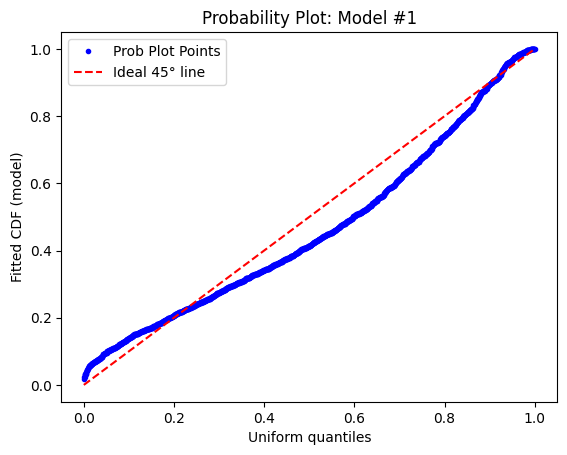

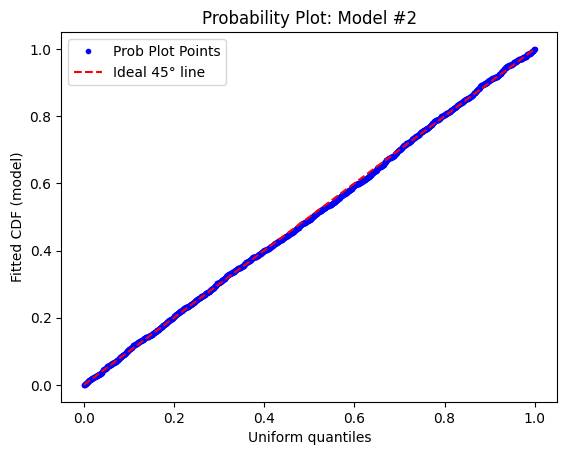

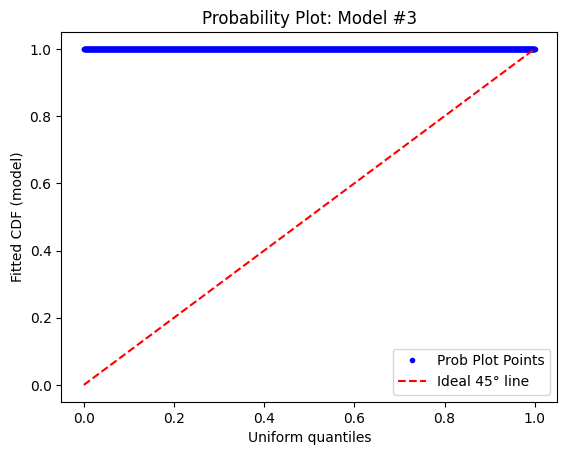

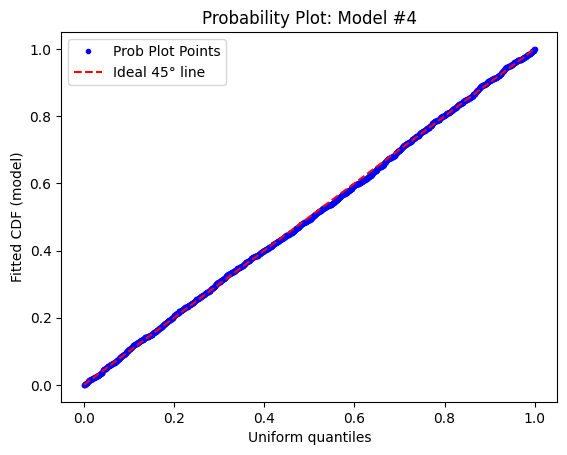

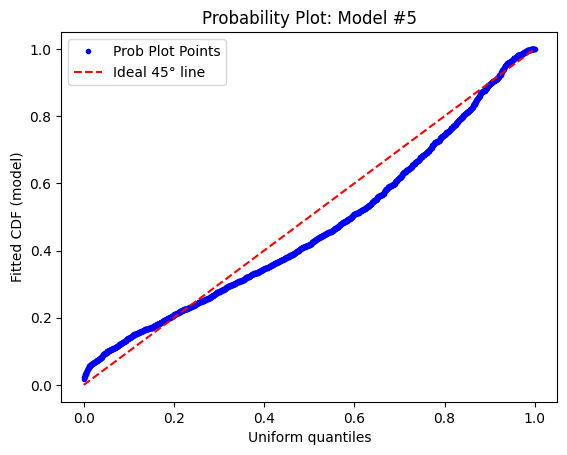

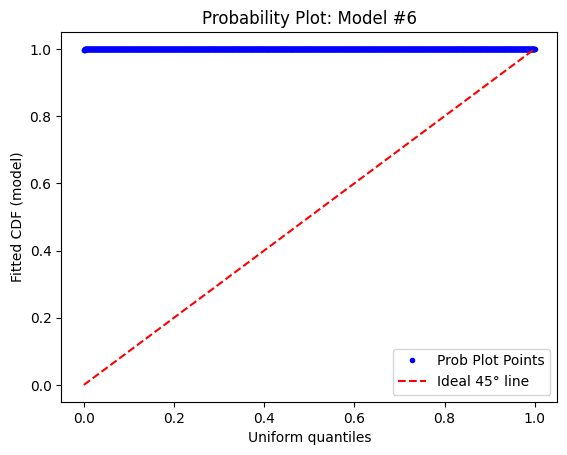

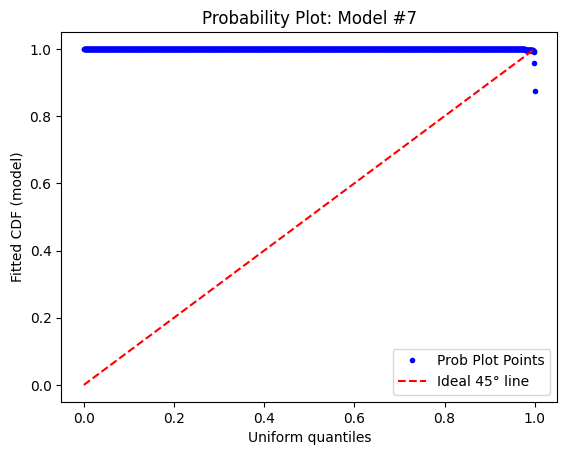

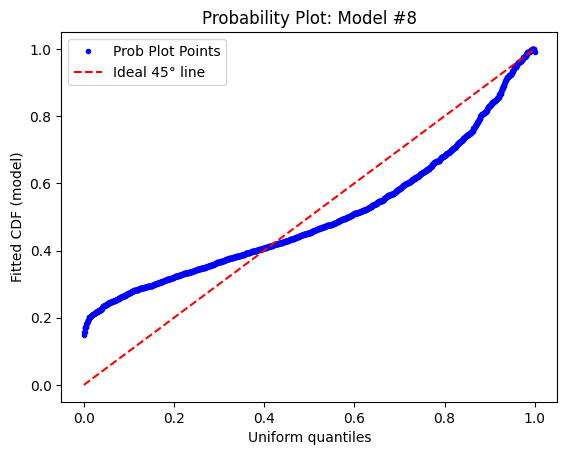

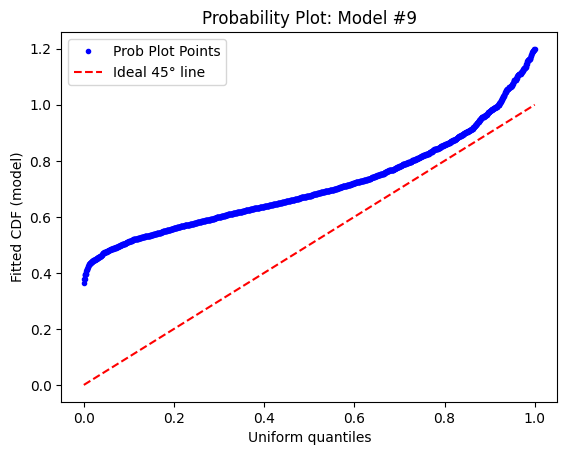

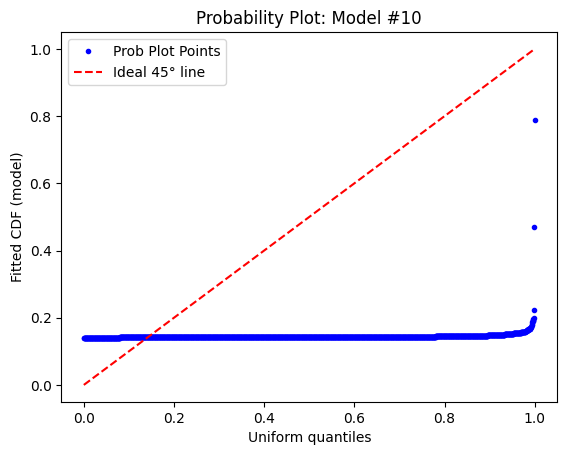

In [ ]:
##############################################
# PROBABILITY PLOTS FOR ALL MODELS
##############################################
def probability_plot(data_array, pdf_func, params, model_name="Model"):
    sorted_data = np.sort(data_array)
    n_ = len(sorted_data)

    # numeric cdf for each x
    def cdf_func(x):
        return numeric_cdf(pdf_func, x, params)

    model_cdf_vals = [cdf_func(x_j) for x_j in sorted_data]
    uniform_q = [(i + 0.5)/n_ for i in range(n_)]

    plt.figure()
    plt.plot(uniform_q, model_cdf_vals, 'bo', markersize=3, label='Prob Plot Points')
    plt.plot([0,1],[0,1],'r--', label='Ideal 45° line')
    plt.title(f"Probability Plot: {model_name}")
    plt.xlabel("Uniform quantiles")
    plt.ylabel("Fitted CDF (model)")
    plt.legend()
    plt.show()


# Example: loop over all
print("\nPlotting Probability Plots for all models...")
for (mname, params, logL, aic, bic) in all_results:
    # pick the PDF as before
    if mname == "Model #1": pdf_ = pdf1
    elif mname == "Model #2": pdf_ = pdf2
    elif mname == "Model #3": pdf_ = pdf3
    elif mname == "Model #4": pdf_ = pdf4
    elif mname == "Model #5": pdf_ = pdf5
    elif mname == "Model #6": pdf_ = pdf6
    elif mname == "Model #7": pdf_ = pdf7
    elif mname == "Model #8": pdf_ = pdf8
    elif mname == "Model #9": pdf_ = pdf9
    else: pdf_ = pdf10

    probability_plot(data, pdf_, params, model_name=mname)
